# Observer 패턴

## O.1 소개

* Observer 패턴은 Behavioral Design Pattern
* 뉴스의 경우:
    * 뉴스 사이트를 방문해서, 새로운 뉴스가 있는지 매 번 확인해야 하는 경우는 매우 번거롭다.
    * 반면 새로운 뉴스가 발생하면, 구독자에게 알려주는 경우는 편리하다.
* 호텔의 wake-up 알람 서비스의 경우:
    * 아침에 깨워야 할 시간이 오면, 투숙객에게 wake-up call
    * 일어날 시간을 확인하기 위해 깼다 잤다를 반복하는 것은 힘들다.
* 전화번호를 보기 위해 마우스로 화면의 버튼을 누르는 경우:
    * 버튼이 클릭되었는지 계속 확인해야 하는 경우는 프로세서가 바쁘게 된다.
    * 버튼이 클릭된 이벤트가 발생한 경우, 알려주고 처리하는 방식이 낭비가 적다.
* 'poll'은 그 서비스가 필요한 사용자가 지속적으로 문의를 해야 하는 것이고, 그 반대를 push라고 한다.
* Observer 패턴은 'push'를 사용하며 절차는:
    * 미리 사용자를 등록한다.
    * 등록된 사용자에게 알려준다.

* 디자인패턴 요소

요소 | 설명
---|---
name | Observer
problem | 1:n관계에서의 정보 갱신
solution | 정보사용자를 등록하고, 정보가 변동하는 경우 알려줌.
consequence | loose coupling, 확장성

* 프로그래밍 예제
    * 날씨 알려주기 ('Weather', HFDP Ch2)
    * 과제
        * 날씨를 알려주기
        * Turtle - 아기거북이가 어디로 가면, 엄마거북이가 다른 곳에 있더라도 쫓아 간다.

## O.2 문제

* 정보공급자에 대해(정보공급자) 알고 싶어하는 다수의 사용자가 존재. 1:n 관계.
* 정보 사용자가 늘어날수록, 알려주는 문제.
* polling - 데이터를 원하는 측 (정보사용자)이 계속 묻는 경우, 비효율적이다.
* 확장성 문제
    * 사용자를 추가하거나, 해제하는 문제
    * 정보를 갱신하는 방법이 바뀌면, 사용자에게 알려주는 방법도 변경되어야 한다.


## O.3 설계

* 인터페이스 분리 (ISP Interface Segregation Principle)
* 구체적인 클래스 상속
* 클라이언트는 구체클래스 보다는 추상적 클래스 사용
* Subject
    * Observable, Publisher
    * 상태가 변경이 되면 알림 기능 (notify)
    * 알림 대상이 되는 Observer를 사전에 등록 (register)
* Observers
    * Subscriber
    * Subject의 상태가 변경이 되면 그 내용을 받아서 반영함 (update)

* 효과
    * 데이터를 원하는 display는 등록하고 기다린다
    * 통화중이면 전화를 또 걸지 않고 '전화 자동발신'하고 다른 작업을 함

In [1]:
import iplantuml

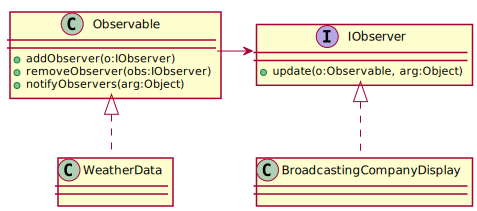

In [2]:
%%plantuml

@startuml

Observable -right-> IObserver
Observable <|.. WeatherData
IObserver <|.. BroadcastingCompanyDisplay

class Observable {
    +addObserver(o:IObserver)
    +removeObserver(obs:IObserver)
    +notifyObservers(arg:Object)
}

Interface IObserver {
    +update(o:Observable, arg:Object)
}
@enduml

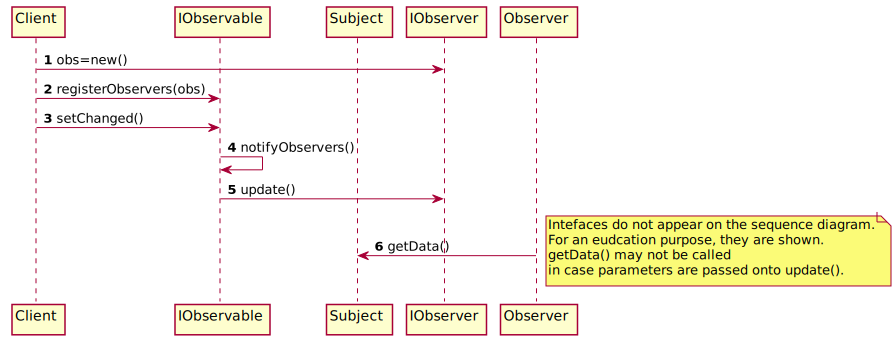

In [2]:
%%plantuml

@startuml
participant Client
participant IObservable
participant Subject
participant IObserver
participant Observer

autonumber
Client -> IObserver:obs=new()
Client -> IObservable:registerObservers(obs)
Client -> IObservable:setChanged()
IObservable -> IObservable:notifyObservers()
IObservable -> IObserver:update()
Observer -> Subject:getData()

note right
    Intefaces do not appear on the sequence diagram.
    For an eudcation purpose, they are shown.
    getData() may not be called
    in case parameters are passed onto update().
end note

@enduml

## O.4 사례

### O.4.1 면적 계산


* JButton은 Observable
* JButton이 ActionListener를 Observer로 등록
* JButton에 버튼 클릭 event가 발생하면, ActionEvent를 생성하고 ActionListener가 사용

```
public ActionEvent(Object source, int id, String command)
```

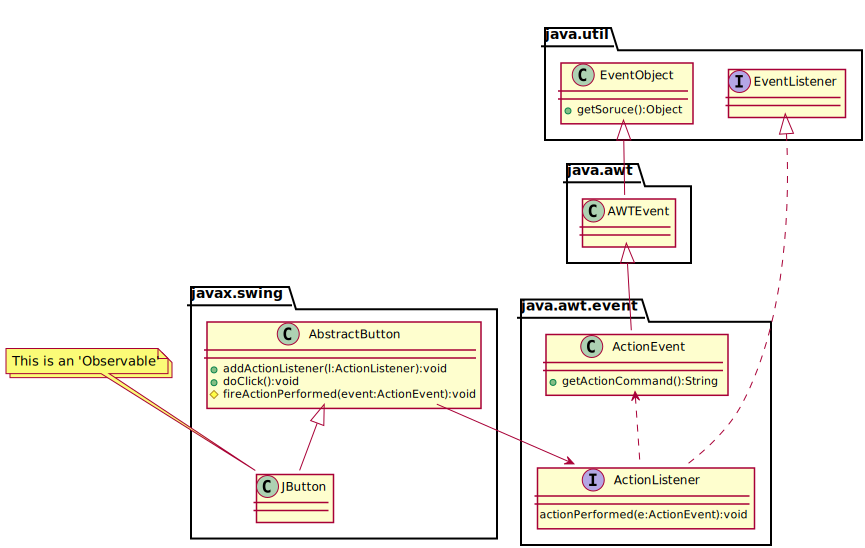

In [4]:
%%plantuml
@startuml

interface java.util.EventListener
interface java.awt.event.ActionListener {
    actionPerformed(e:ActionEvent):void
}

java.util.EventListener <|.. java.awt.event.ActionListener

class java.util.EventObject {
    +getSoruce():Object
}
class java.awt.AWTEvent
class java.awt.event.ActionEvent {
    +getActionCommand():String
}
java.util.EventObject <|-- java.awt.AWTEvent
java.awt.AWTEvent <|-- java.awt.event.ActionEvent
java.awt.event.ActionListener .up.> java.awt.event.ActionEvent
class javax.swing.AbstractButton {
    +addActionListener(l:ActionListener):void
    +doClick():void
}
class javax.swing.JButton
note left: This is an 'Observable'
javax.swing.AbstractButton <|-- javax.swing.JButton
javax.swing.AbstractButton -right-> java.awt.event.ActionListener

@enduml

In [ ]:
# %load src/com/sd/gui/CalcAreaGUIMain.java
/*
 * @author jsl
 * @version 20161208
 * Problems: can not access to JTextFields from CalcAreaListener
 */
package com.sd.gui;
import java.awt.*;
import javax.swing.*;

public class CalcAreaGUIMain {
    public static void main(String[] args) {
        JFrame f=new JFrame();
        JPanel panel=new JPanel(new GridLayout(3,2));
        f.getContentPane().add(panel);
        JLabel label1=new JLabel("반지름");
        JLabel label2=new JLabel("면적");
        JTextField radiusTf1=new JTextField(20);
        JTextField areaTf2=new JTextField(20);
        JButton b1=new JButton("계산");
        JButton b2=new JButton("취소");
        //b1.setPreferredSize(new Dimension(40, 40));
        b1.addActionListener(new CalcAreaListener());
        b2.addActionListener(new CalcAreaListener());
        panel.add(label1);
        panel.add(radiusTf1);
        panel.add(label2);
        panel.add(areaTf2);
        panel.add(b1);
        panel.add(b2);
        //f.setDefaultCloseOperation(EXIT_ON_CLOSE);
        f.pack();
        f.setVisible(true);
    }   
}



In [ ]:
# %load src/com/sd/gui/CalcAreaListener.java
/*
 * @author jsl
 * @version 20161208
 */
package com.sd.gui;
import java.awt.event.*;
import javax.swing.*;

// CalcListener can not access to JTextFields
class CalcAreaListener implements ActionListener {
    public void actionPerformed(ActionEvent e) {
        JButton b=(JButton)e.getSource();
        String cmd=e.getActionCommand();
        if (cmd.equals("계산")) {
            System.out.println("계산 버튼");
            b.setText("계산했습니다");
        } else if (cmd.equals("취소")) {
            System.out.println("취소 버튼");
            b.setText("취소했습니다");
        } else {
            System.out.println("버튼을 '..했습니다'로 변경하면 cmd도 변경된다.");
        }
    }
}


In [ ]:
!javac -d classes/ -sourcepath src src/com/sd/gui/CalcAreaGUIMain.java
!java -cp classes/ com.sd.gui.CalcAreaGUIMain

### O.4.2 날씨

* 객체에서 나누어지는 서로 다른 기능이 있는 경우, 인터페이스로 분리
* 교재 HFDP Ch2 'Weather'
* 정보공급자는 정기적으로 계속 온도, 습도, 기압을 측정, 수집
* 온도 getTemperature(), 습도 getHummidity(), 기압 getPressure() 수집.
* 방송국, 농사, 운동경기 관련 사이트에서 그 정보를 사용
* 정된 날씨 데이터는 배포measurementsChanged()

* 패턴을 적용하기 전
    * WeatherData를 polling, 날씨가 변동이 있는지 계속 묻는 방식

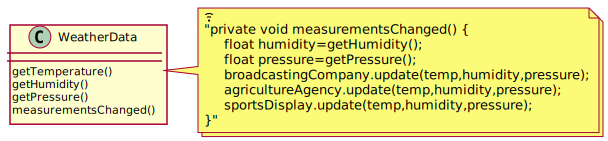

In [3]:
%%plantuml
@startuml
class WeatherData {
    getTemperature()
    getHumidity()
    getPressure()
    measurementsChanged()
}
note right
   <&wifi>
   "private void measurementsChanged() {
        float humidity=getHumidity();
        float pressure=getPressure();
        broadcastingCompany.update(temp,humidity,pressure);
        agricultureAgency.update(temp,humidity,pressure);
        sportsDisplay.update(temp,humidity,pressure);
   }"
end note
@enduml

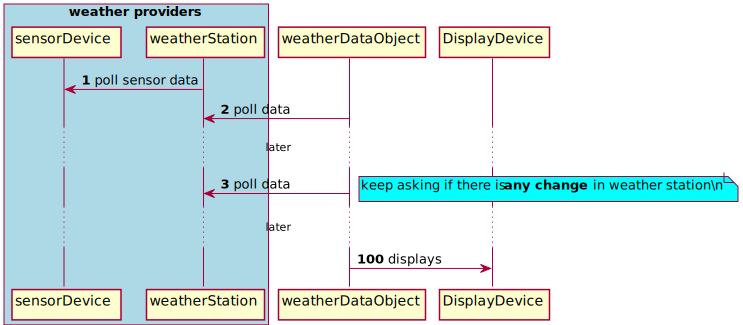

In [6]:
%%plantuml

@startuml

box "weather providers" #LightBlue
  participant sensorDevice
  participant weatherStation
end box

autonumber
sensorDevice <- weatherStation: poll sensor data
weatherStation <- weatherDataObject: poll data
... later ...
weatherStation <- weatherDataObject: poll data

... later ...
autonumber 100
note right #aqua
  keep asking if there is **any change** in weather station\n
end note
weatherDataObject -> DisplayDevice: displays

@enduml

* 패턴의 적용

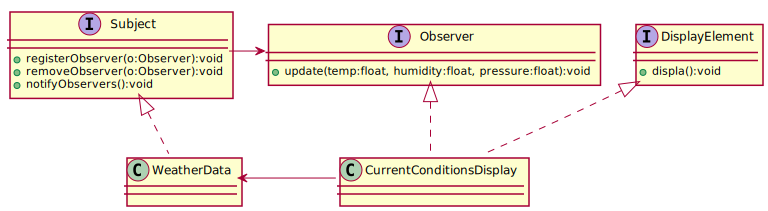

In [10]:
%%plantuml

@startuml

Subject .right.> Observer
Subject <|.. WeatherData
Observer <|.. CurrentConditionsDisplay
DisplayElement <|.. CurrentConditionsDisplay
CurrentConditionsDisplay -left-> WeatherData
interface Subject {
    +registerObserver(o:Observer):void
    +removeObserver(o:Observer):void
    +notifyObservers():void
}
interface Observer {
    +update(temp:float, humidity:float, pressure:float):void
}
interface DisplayElement {
    +display():void
}
@enduml

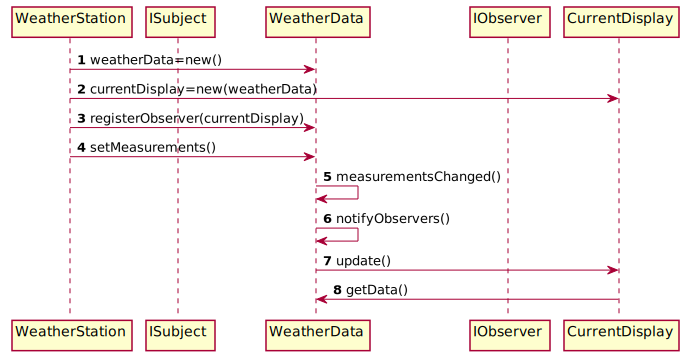

In [2]:
%%plantuml

@startuml
participant WeatherStation
participant ISubject
participant WeatherData
participant IObserver
participant CurrentDisplay

autonumber
WeatherStation -> WeatherData:weatherData=new()
WeatherStation -> CurrentDisplay:currentDisplay=new(weatherData)
WeatherStation -> WeatherData:registerObserver(currentDisplay)
WeatherStation -> WeatherData:setMeasurements()
WeatherData -> WeatherData:measurementsChanged()
WeatherData -> WeatherData:notifyObservers()
WeatherData -> CurrentDisplay:update()
CurrentDisplay -> WeatherData:getData()
@enduml

In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/observer/weather/Subject.java
package headfirst.observer.weather;

public interface Subject {
	public void registerObserver(Observer o);
	public void removeObserver(Observer o);
	public void notifyObservers();
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/observer/weather/Observer.java
package headfirst.observer.weather;

public interface Observer {
	public void update(float temp, float humidity, float pressure);
}


In [ ]:
* Generic을 정해서 사용할 수 있다.
    * ArrayList<Observer> observers;
* CurrentConditionsDisplay 생성자에서 Subject WeatherData를 사용하고 있다. 별도의 main함수에서 처리하는 것이 자연스럽다.

In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/observer/weather/WeatherData.java
package headfirst.observer.weather;

import java.util.*;

public class WeatherData implements Subject {
	private ArrayList observers;
	private float temperature;
	private float humidity;
	private float pressure;
	
	public WeatherData() {
		observers = new ArrayList();
	}
	
	public void registerObserver(Observer o) {
		observers.add(o);
	}
	
	public void removeObserver(Observer o) {
		int i = observers.indexOf(o);
		if (i >= 0) {
			observers.remove(i);
		}
	}
	
	public void notifyObservers() {
		for (int i = 0; i < observers.size(); i++) {
			Observer observer = (Observer)observers.get(i);
			observer.update(temperature, humidity, pressure);
		}
	}
	
	public void measurementsChanged() {
		notifyObservers();
	}
	
	public void setMeasurements(float temperature, float humidity, float pressure) {
		this.temperature = temperature;
		this.humidity = humidity;
		this.pressure = pressure;
		measurementsChanged();
	}
	
	public float getTemperature() {
		return temperature;
	}
	
	public float getHumidity() {
		return humidity;
	}
	
	public float getPressure() {
		return pressure;
	}
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/observer/weather/CurrentConditionsDisplay.java
package headfirst.observer.weather;
	
public class CurrentConditionsDisplay implements Observer, DisplayElement {
	private float temperature;
	private float humidity;
	private Subject weatherData;
	
	public CurrentConditionsDisplay(Subject weatherData) {
		this.weatherData = weatherData;
		weatherData.registerObserver(this);
	}
	
	public void update(float temperature, float humidity, float pressure) {
		this.temperature = temperature;
		this.humidity = humidity;
		display();
	}
	
	public void display() {
		System.out.println("Current conditions: " + temperature 
			+ "F degrees and " + humidity + "% humidity");
	}
}


In [ ]:
# %load src/headfirst/observer/weather/DisplayElement.java
package headfirst.observer.weather;

public interface DisplayElement {
	public void display();
}


In [ ]:
# %load /Users/media/Code/git/sd/src/headfirst/observer/weather/WeatherStation.java
package headfirst.observer.weather;

import java.util.*;

public class WeatherStation {

	public static void main(String[] args) {
		WeatherData weatherData = new WeatherData();
	
		CurrentConditionsDisplay currentDisplay = 
			new CurrentConditionsDisplay(weatherData);
		StatisticsDisplay statisticsDisplay = new StatisticsDisplay(weatherData);
		ForecastDisplay forecastDisplay = new ForecastDisplay(weatherData);

		weatherData.setMeasurements(80, 65, 30.4f);
		weatherData.setMeasurements(82, 70, 29.2f);
		weatherData.setMeasurements(78, 90, 29.2f);
	}
}


In [5]:
%pwd

u'/home/jsl/Code/git/bb/sd'

In [16]:
# change to the root directory
!javac -d classes/ -sourcepath src src/headfirst/observer/weather/*.java
!java -cp classes/ headfirst.observer.weather.WeatherStation

/Users/media/Code/git/sd
javac: file not found: src/headfirst/observer/weather/*.java
Usage: javac <options> <source files>
use -help for a list of possible options
오류: 기본 클래스 headfirst.observer.weather.WeatherStation을(를) 찾거나 로드할 수 없습니다.


### O.4.3 거북이

#### O.4.3.1 아기 거북이 지켜보기

* 내용
    * 아기 거북이는 이 곳 저 곳 움직인다.
    * 엄마 거북이는 아기 거북이가 어디로 움직이면 알아야 하고, 그 곳으로 가야 한다.

* 구현 주의:
    * java.util의 인터페이스 Observer, 클래스 Observable을 사용한다.
    * BayTurtle은 Turtle을 상속받지 않고 구현한다. 다중상속을 사용할 수 없기 때문에 Turtle을 연관관계를 가지고 사용한다.
        * 참고: MomTurtle은 Turtle을 상속받는다.
    * 자바 java.util.Observable의 setChanged()는 protected로 패키지클래스 및 상속클래스 외에는 이 함수를 사용하지 못하도록 한다.
    ```
     69     protected void setChanged() {
     70         myCurpos=baby.getPos();
     71     }
    ```

    * Observer의 update를 호출할 때, argument에 메시지가 포함된다.
        ```
         65     public void notifyObservers() {
         66         for(Observer o:obs)
         67             o.update(this, 1);
         68     }
         ```

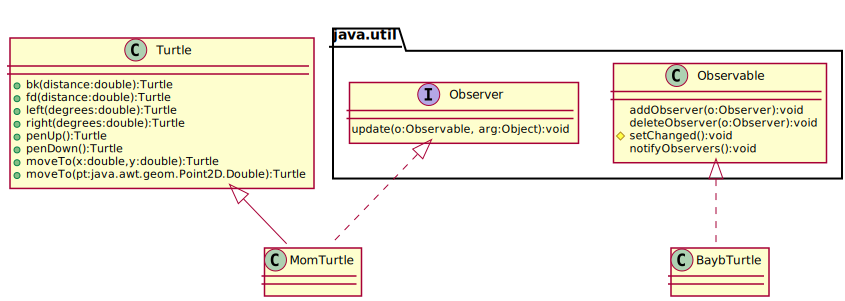

In [3]:
%%plantuml

@startuml
interface java.util.Observer {
    update(o:Observable, arg:Object):void
}
class java.util.Observable {
    addObserver(o:Observer):void
    deleteObserver(o:Observer):void
    #setChanged():void
    notifyObservers():void
}

class Turtle {
    +bk(distance:double):Turtle
    +fd(distance:double):Turtle
    +left(degrees:double):Turtle
    +right(degrees:double):Turtle
    +penUp():Turtle
    +penDown():Turtle
    +getPos():java.awt.geom.Point2D.Double
    +moveTo(x:double,y:double):Turtle
    +moveTo(pt:java.awt.geom.Point2D.Double):Turtle
}
Turtle <|-- MomTurtle
java.util.Observer <|.. MomTurtle
java.util.Observable <|.. BaybTurtle
@enduml

In [ ]:
# %load /Users/media/Code/git/sd/src/com/sd/turtle/TurtleObserverMain.java
/* 
 * @author jsl
 * @since 20160310
 * Demonstrate the Observable class and the Observer interface. 
 * The MomTurtle observes and moves to the position of the BabyTurtle.
 * 1) mom moves and baby also moves
 * 2) baby's notification is set on to let mom know
*/ 

package com.sd.turtle;

import java.util.Observer;
import java.util.Observable;
import java.util.ArrayList;
import java.awt.geom.Point2D.Double;
import java.awt.Color;
import ch.aplu.turtle.*;

public class TurtleObserverMain {
    public static void main(String[] args) {
        System.out.println("--Observer pattern demo");
        //turtle subject
        BabyTurtle baby=new BabyTurtle();
        //turtle observer
        MomTurtle mom=new MomTurtle();
        baby.addObserver(mom);
        //mom goes to somewhere
        mom.moveTo(100,100);
        //baby moves and let mom know it
        baby.move(100,-100);
        //protected method -> others can not set any changes
        baby.setChanged();
        baby.notifyObservers();
    }
}

class MomTurtle extends Turtle implements Observer {
    Double babyCurpos;
    public MomTurtle() {
        setColor(Color.red);
        label("mom turtle");
    }
    public void update(Observable o, Object arg) {
        System.out.println("update() called, count is " + ((Integer)arg).intValue()); 
        babyCurpos=((BabyTurtle)o).myCurpos;
        System.out.println("current pos" + babyCurpos);
        moveTo(babyCurpos);
    }
}

//BayTurtle did not inherit Turtle
//because multiple inheritance is not allowed in java
class BabyTurtle extends Observable {
    Turtle baby;
    Double myCurpos;
    ArrayList<Observer> obs;
    public BabyTurtle() {
        baby = new Turtle();
        myCurpos=baby.getPos();
        obs=new ArrayList<Observer>();
    }
    public void addObserver(Observer o) {
        obs.add(o);
    }
    public void notifyObservers() {
        for(Observer o:obs)
            o.update(this, 1);
    }
    protected void setChanged() {
        myCurpos=baby.getPos();
    }
    public void move(int x, int y) {
        baby.moveTo(x,y);
    }
}


In [ ]:
!javac -d classes/ -cp lib/aplu5.jar:classes/ -sourcepath src/ src/com/sd/turtle/TurtleObserverMain.java 
!java -cp lib/aplu5.jar:classes/ com.sd.turtle.TurtleObserverMain

#### O.4.3.2 거북이 키/마우스로 움직이기

* 키보드/ 마우스에 이벤트가 발생하면 거북이를 움직인다.
* Observer패턴을 사용한다.
* KeyAdapter, MouseAdapter, MouseMotionAdapter를 사용한다.
